**Q21**. 

Suppose a coin has probability $p$ of falling heads
up. If we flip the coin many times, we would expect the proportion of
heads to be near $p$. We will make this formal later. Take $p = .3$ and
$n = 1, 000$ and simulate n coin flips. Plot the proportion of heads as a
function of $n$. Repeat for $p = .03$.

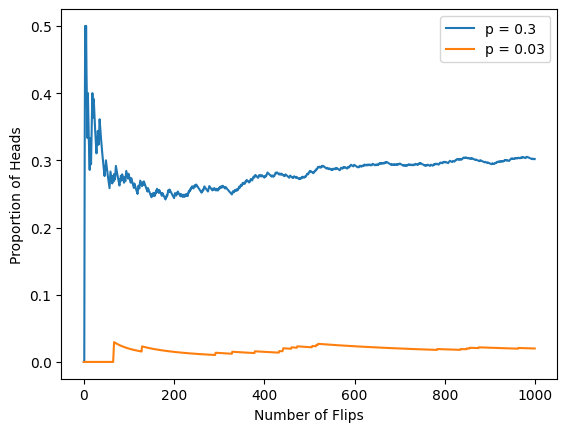

In [1]:
import random
import matplotlib.pyplot as plt

def simulate_coin_flips(p, n):
    flips = [random.random() < p for _ in range(n)]
    return flips

def calculate_proportions(flips):
    cumulative_heads = 0
    proportions = []
    for i, flip in enumerate(flips, start=1):
        if flip:
            cumulative_heads += 1
        proportion = cumulative_heads / i
        proportions.append(proportion)
    return proportions

def plot_proportions(proportions, p):
    plt.plot(proportions, label=f'p = {p}')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()

p1 = 0.3
n1 = 1000
flips1 = simulate_coin_flips(p1, n1)
proportions1 = calculate_proportions(flips1)
plot_proportions(proportions1, p1)

p2 = 0.03
n2 = 1000
flips2 = simulate_coin_flips(p2, n2)
proportions2 = calculate_proportions(flips2)
plot_proportions(proportions2, p2)

plt.show()

**Q22**.  
Suppose we flip a coin n times and let p denote
the probability of heads. Let $X$ be the number of heads. We call $X$
a binomial random variable, which is discussed in the next chapter.
Intuition suggests that $X$ will be close to $n · p$. To see if this is true, we
can repeat this experiment many times and average the $X$ values. Carry out a simulation and compare the average of the $X’s$ to $n · p$. Try this for
$p = .3$ and $n = 10$, $n = 100$, and $n = 1, 000$

For p = 0.3 and n = 10:
  Average of X's: 3.00
  n * p: 3.00

For p = 0.3 and n = 100:
  Average of X's: 29.91
  n * p: 30.00

For p = 0.3 and n = 1000:
  Average of X's: 299.64
  n * p: 300.00



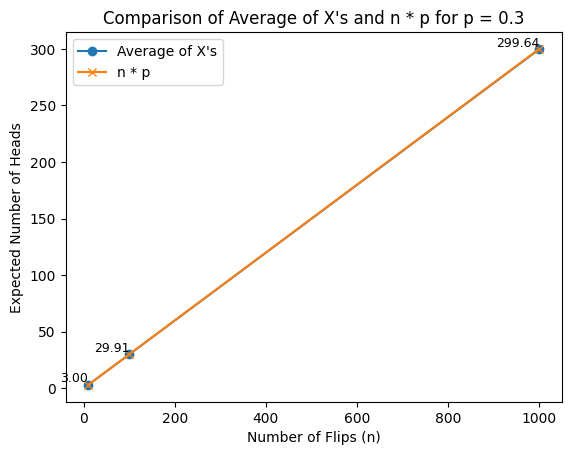

In [6]:
import random
import matplotlib.pyplot as plt

def simulate_coin_flips(p, n):
    flips = [random.random() < p for _ in range(n)]
    return sum(flips)

def run_experiment(p, n, num_trials):
    total_heads = 0
    for _ in range(num_trials):
        total_heads += simulate_coin_flips(p, n)
    return total_heads / num_trials

def plot_results(ns, results, p):
    np_values = [n * p for n in ns]
    plt.plot(ns, results, 'o-', label="Average of X's")
    plt.plot(ns, np_values, 'x-', label="n * p")
    plt.xlabel('Number of Flips (n)')
    plt.ylabel('Expected Number of Heads')
    plt.title(f"Comparison of Average of X's and n * p for p = {p}")
    plt.legend()

    for n, result in zip(ns, results):
        plt.text(n, result, f"{result:.2f}", fontsize=9, ha='right', va='bottom')

    plt.show()

p = 0.3
num_trials = 1000
ns = [10, 100, 1000]
results = [run_experiment(p, n, num_trials) for n in ns]
for index,average_heads in enumerate(results):
    np = ns[index] * p
    print(f"For p = {p} and n = { ns[index]}:")
    print(f"  Average of X's: {average_heads:.2f}")
    print(f"  n * p: {np:.2f}\n")

plot_results(ns, results, p)


**Q23**.

Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let $A = {2, 4, 6}$ and $B = {1, 2, 3, 4}$. Then, $P(A) = \frac{1}{2}$, $P(B) = \frac{2}{3}$ and $P(AB) = \frac{1}{3}$. Since $P(AB) = P(A)P(B)$, the events $A$ and $B$ are independent. Simulate draws from the sample space and verify that $P(AB) = P(A)P(B)$ where $P(A)$ is the proportion of times $A$ occurred in the simulation and similarly for $P(AB)$ and $P(B)$. Now find two events $A$ and $B$ that are not independent. Compute $P(A)$, $P(B)$ and $P(AB)$. Compare the calculated values to their theoretical values. Report your results and interpret.

In [9]:
import random
A = {2, 4, 6}
B = {1, 2, 3, 4}
def simulate_dice_roll(num_trials):
    

    count_A, count_B, count_AB = 0, 0, 0

    for _ in range(num_trials):
        roll = random.randint(1, 6)
        if roll in A:
            count_A += 1
        if roll in B:
            count_B += 1
        if roll in A and roll in B:
            count_AB += 1

    P_A = count_A / num_trials
    P_B = count_B / num_trials
    P_AB = count_AB / num_trials

    return P_A, P_B, P_AB

num_trials = 100000

P_A, P_B, P_AB = simulate_dice_roll(num_trials)

print(f"P(A) = {P_A:.4f} (Theoretical: 0.5)")
print(f"P(B) = {P_B:.4f} (Theoretical: 2/3 ≈ 0.6667)")
print(f"P(AB) = {P_AB:.4f} (Theoretical: 1/3 ≈ 0.3333)")
print(f"P(A) * P(B) = {P_A * P_B:.4f}")

# Non-independent events
A = {1, 5, 6}
B = {1, 2, 3, 4}

P_A, P_B, P_AB = simulate_dice_roll(num_trials)

print("\nNon-independent events:")
print(f"P(A) = {P_A:.4f} (Theoretical: 0.5)")
print(f"P(B) = {P_B:.4f} (Theoretical: 2/3 ≈ 0.6667)")
print(f"P(AB) = {P_AB:.4f} (Theoretical: 1/6 ≈ 0.1667)")
print(f"P(A) * P(B) = {P_A * P_B:.4f}")


P(A) = 0.5003 (Theoretical: 0.5)
P(B) = 0.6658 (Theoretical: 2/3 ≈ 0.6667)
P(AB) = 0.3318 (Theoretical: 1/3 ≈ 0.3333)
P(A) * P(B) = 0.3331

Non-independent events:
P(A) = 0.4982 (Theoretical: 0.5)
P(B) = 0.6680 (Theoretical: 2/3 ≈ 0.6667)
P(AB) = 0.1662 (Theoretical: 1/6 ≈ 0.1667)
P(A) * P(B) = 0.3328
